In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(ggrepel))
suppressMessages(library(rhdf5))
suppressMessages(library(svglite))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)
addArchRGenome("hg38")

Setting default number of Parallel threads to 64.

Setting default genome to Hg38.



In [3]:
proj <- loadArchRProject("./ArchRProject", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
proj


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject 
samples(11): 11T 12N ... 21T 22T
sampleColData names(1): ArrowFiles
cellColData names(16): Sample TSSEnrichment ... BlacklistRatio
  neoadjuvant
numberOfCells(1): 86017
medianTSS(1): 17.122
medianFrags(1): 13190

Saving 7 x 7 in image


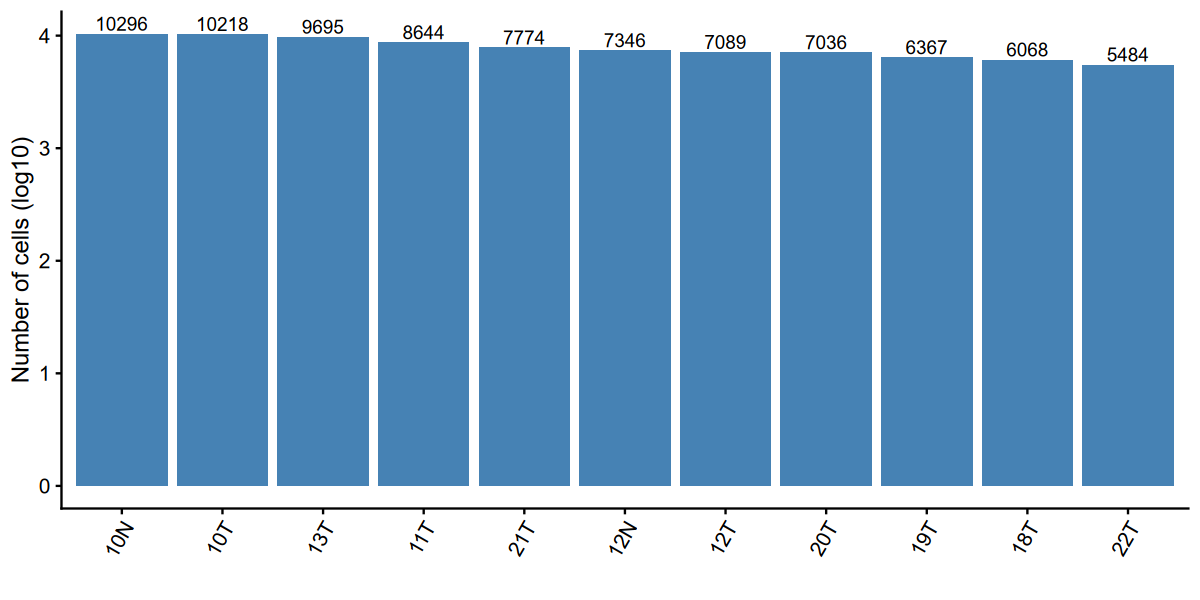

In [14]:
# number of cells per sample
# 统计每个样本的细胞数, 绘制柱状图
df <- proj@cellColData %>%
    as.data.frame() %>%
    group_by(Sample) %>%
    summarise(n_cells = n(),
             n_fragments = sum(nFrags))

p <- ggplot(data = df, aes(x = reorder(Sample, -n_cells), y = log10(n_cells))) +
    geom_bar(stat = "identity", fill = "steelblue") +
    geom_text(aes(label=n_cells), position=position_dodge(width=0.9), vjust=-0.25) +
    xlab("") + ylab("Number of cells (log10)") +
    theme_cowplot() +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))

options(repr.plot.width = 10, repr.plot.height = 5)

ggsave("/data/hanxue/BCY_ATAC/joint_output/cells-per-sample.svg",plot = p, device = "svg")

p


1 


1 


Saving 7 x 7 in image
Saving 7 x 7 in image


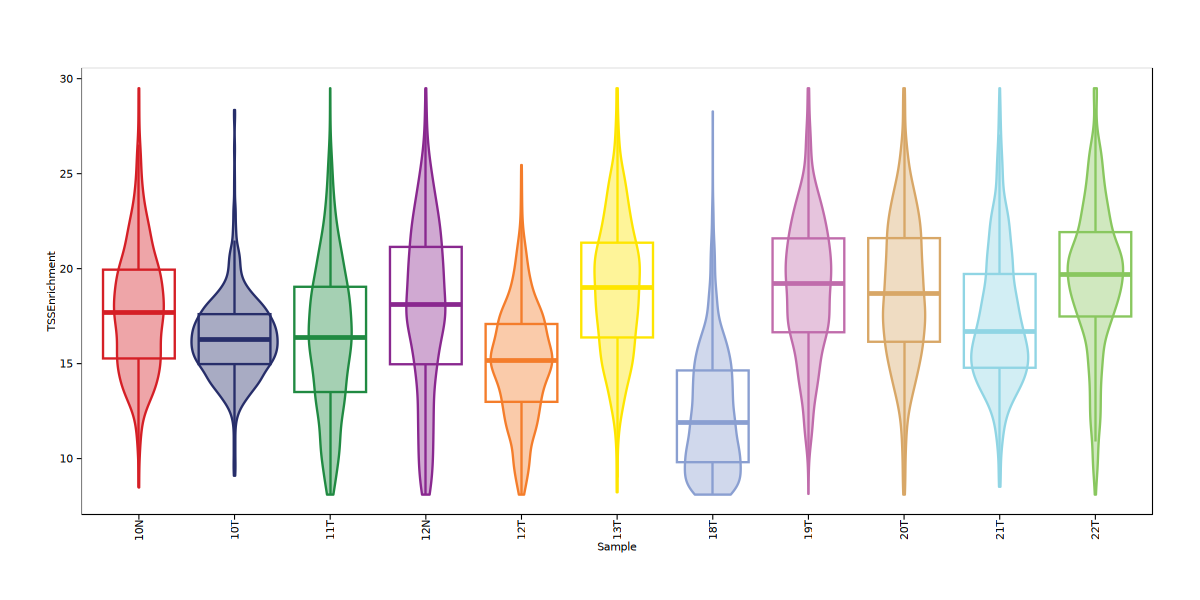

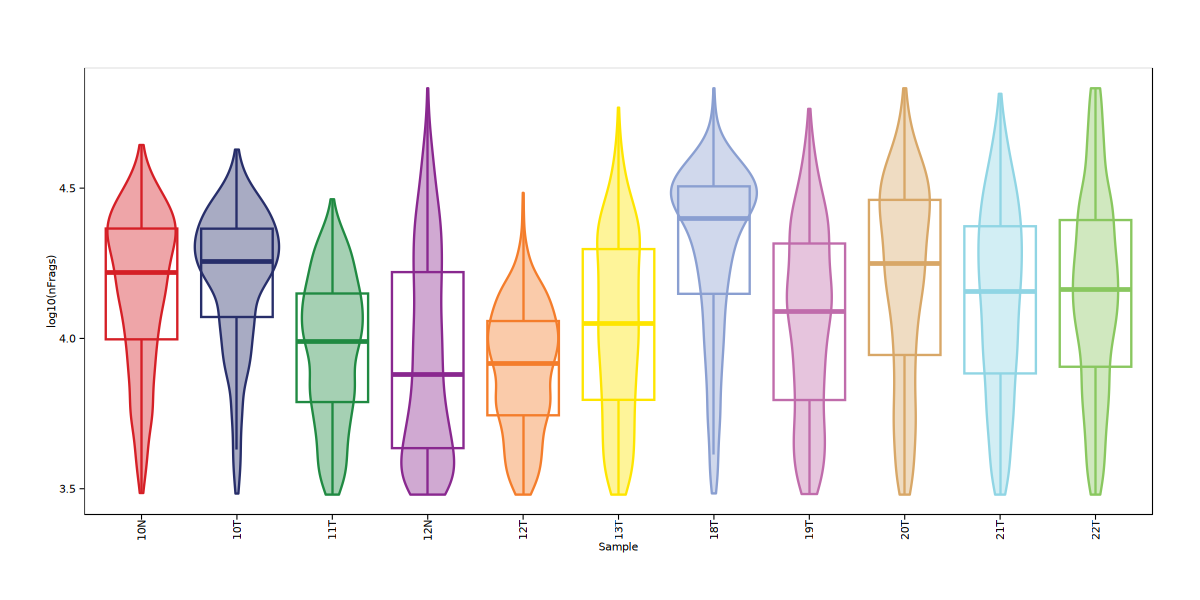

In [20]:
## Visualize data quality
## 统计TSSEnrichment和log10(nFrags)的分布
p1 <- plotGroups(ArchRProj = proj, 
                 groupBy = "Sample", 
                 colorBy = "cellColData", 
                 name = "TSSEnrichment",
                 alpha = 0.4,
                 plotAs = "violin",
                 addBoxPlot = TRUE)

p2 <- plotGroups(ArchRProj = proj, 
                 groupBy = "Sample", 
                 colorBy = "cellColData", 
                 name = "log10(nFrags)",
                 plotAs = "violin",
                 alpha = 0.4,
                 addBoxPlot = TRUE)

options(repr.plot.width = 10, repr.plot.height = 5)
ggsave("/data/hanxue/BCY_ATAC/joint_output/TSSEnrichment.svg",plot = p1, device = "svg")
ggsave("/data/hanxue/BCY_ATAC/joint_output/Fragments.svg",plot = p2, device = "svg")
p1
p2

1 


1 




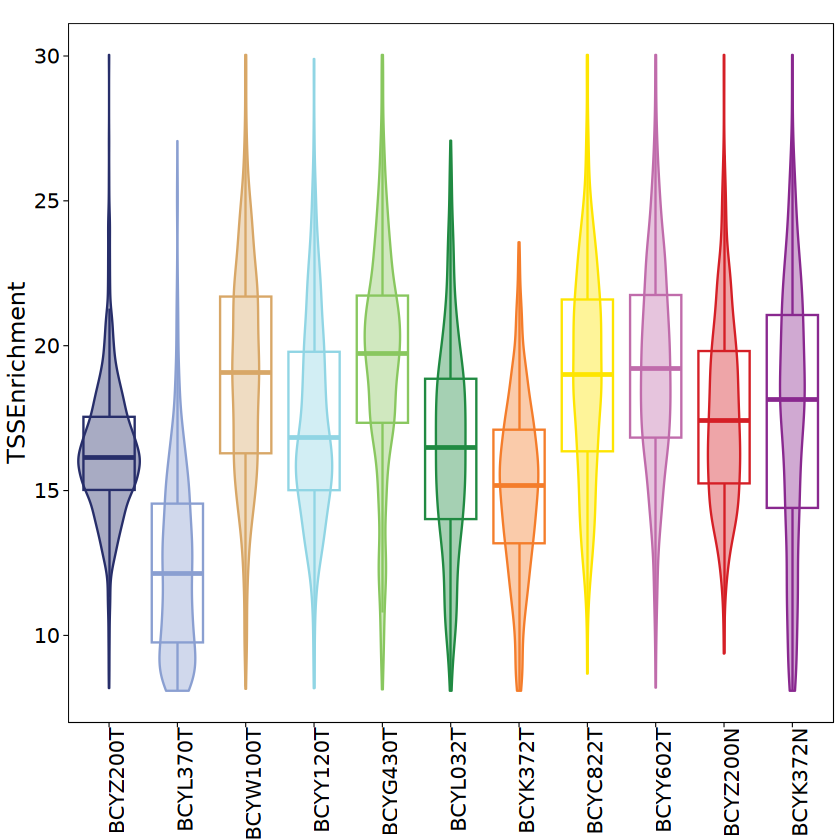

Plotting Ggplot!

Plotting Ggplot!



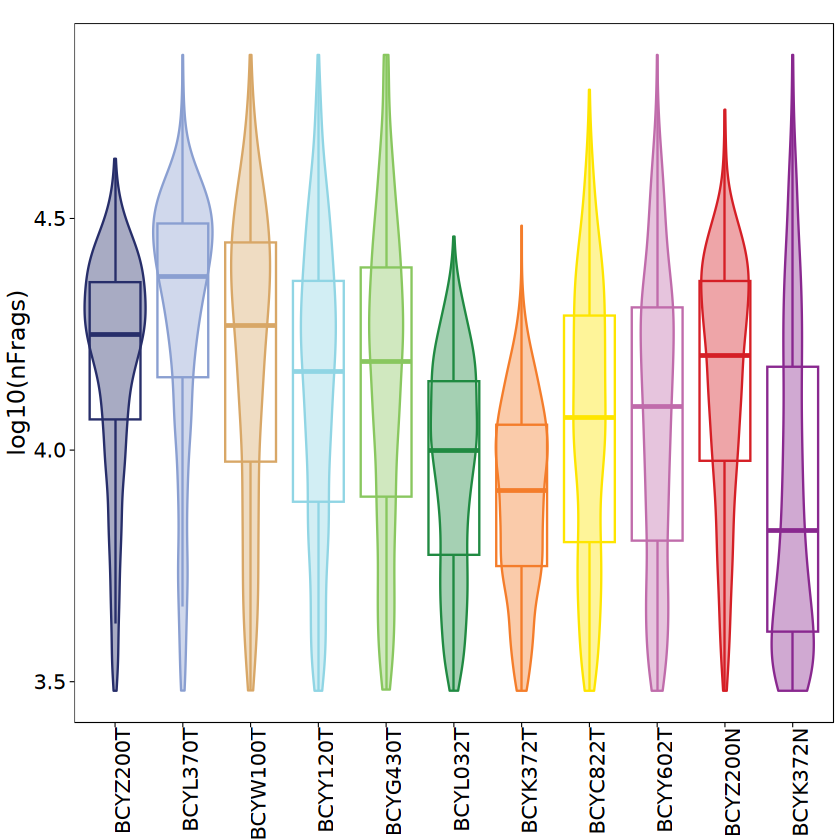

In [6]:
library(ggplot2)
library(grid)  # 为 unit()

barlabels1 <- c('10T','18T','20T','21T','22T','11T','12T','13T','19T','10N','12N')
barlabels2 <- c('BCYZ200T','BCYL370T','BCYW100T','BCYY120T','BCYG430T',
                'BCYL032T','BCYK372T','BCYC822T','BCYY602T','BCYZ200N','BCYK372N')

# 一个小工具：加紧凑主题与x轴映射
compact_axis <- function(p){
  p +
    scale_x_discrete(limits = barlabels1, labels = barlabels2) +
    theme(
      # 横纵坐标刻度
      axis.text.x  = element_text(angle = 90, hjust = 1, vjust = 1,
                                  size = 12),
      axis.text.y  = element_text(size = 12),
      # 去掉 X 轴标题
      axis.title.x = element_blank(),
      # 保留并设置 Y 轴标题
      axis.title.y = element_text(size = 14),
      # 其他紧凑主题设置
      plot.margin  = margin(2, 4, 2, 4),
      panel.grid.major.x = element_blank()
    )
}

p1 <- plotGroups(ArchRProj = proj, 
                 groupBy = "Sample", 
                 colorBy = "cellColData", 
                 name = "TSSEnrichment",
                 alpha = 0.4,
                 plotAs = "violin",
                 addBoxPlot = TRUE)

p2 <- plotGroups(ArchRProj = proj, 
                 groupBy = "Sample", 
                 colorBy = "cellColData", 
                 name = "log10(nFrags)",
                 alpha = 0.4,
                 plotAs = "violin",
                 addBoxPlot = TRUE)

p1 <- compact_axis(p1)
p2 <- compact_axis(p2)

# 更紧凑的导出尺寸
# ggsave("/home/hanxue/lab/scRNA/neoadjuvant/output_figures/Sample_TSSEnrichment.svg", p1, device="svg", width=7, height=4)
# ggsave("/home/hanxue/lab/scRNA/neoadjuvant/output_figures/Sample_Fragments.svg",       p2, device="svg", width=7, height=4)

p1; p2
plotPDF( p1, p2,
    name = "ATAC-QC.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 4, height = 4)


1 




1 


Plotting Ggplot!

Plotting Ggplot!



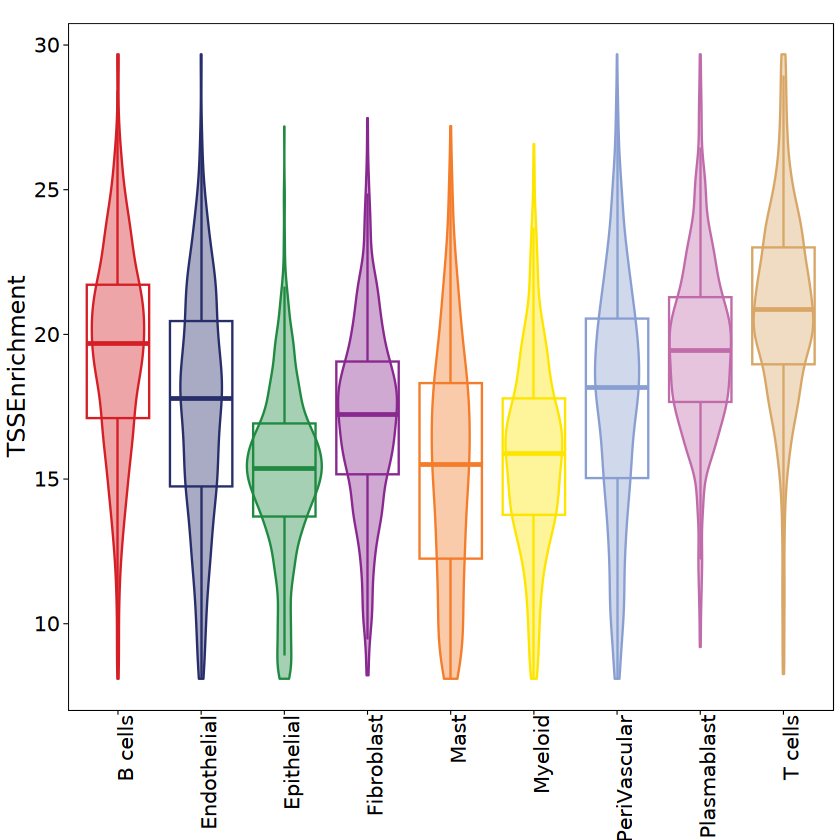

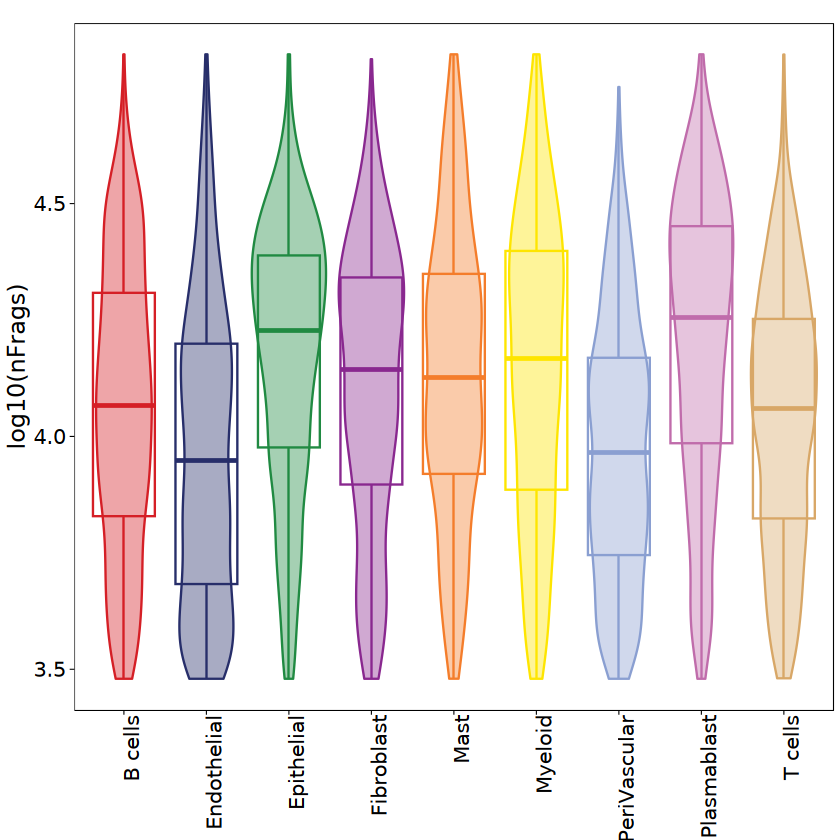

In [7]:
compact_theme <- function(p){
  p +
    theme(
      # 横纵坐标刻度
      axis.text.x  = element_text(angle = 90, hjust = 1, vjust = 1,
                                  size = 12),
      axis.text.y  = element_text(size = 12),
      # 去掉 X 轴标题
      axis.title.x = element_blank(),
      # 保留并设置 Y 轴标题
      axis.title.y = element_text(size = 14),
      # 其他紧凑主题设置
      plot.margin  = margin(2, 4, 2, 4),
      panel.grid.major.x = element_blank()
    )
}


p1 <- plotGroups(ArchRProj = proj, 
                 groupBy = "majorType", 
                 colorBy = "cellColData", 
                 name = "TSSEnrichment",
                 alpha = 0.4,
                 plotAs = "violin",
                 addBoxPlot = TRUE)

p2 <- plotGroups(ArchRProj = proj, 
                 groupBy = "majorType", 
                 colorBy = "cellColData", 
                 name = "log10(nFrags)",
                 alpha = 0.4,
                 plotAs = "violin",
                 addBoxPlot = TRUE)

p1 <- compact_theme(p1)
p2 <- compact_theme(p2)

# 更紧凑的导出尺寸
# ggsave("/home/hanxue/lab/scRNA/neoadjuvant/output_figures/CellType_TSSEnrichment.svg", p1, device="svg", width=7, height=3.6)
# ggsave("/home/hanxue/lab/scRNA/neoadjuvant/output_figures/CellType_Fragments.svg",       p2, device="svg", width=7, height=3.6)
plotPDF( p1, p2,
    name = "ATAC-QC-CellType.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 4, height = 4)

p1; p2

In [16]:
plotPDF(p, p1, p2, name = "QC-Sample-Statistics.pdf", ArchRProj = proj, addDOC = FALSE, width = 8, height = 8)

ERROR: Error in pdf(filename, width = width, height = height, useDingbats = useDingbats): cannot open file '/home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject/Plots//data/hanxue/BCY_ATAC/joint_output/QC-Sample-Statistics.pdf'


In [7]:
## Session information

sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/hanxue/miniconda3/envs/scseq/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] svglite_2.1.3               ggrepel_0.9.6              
 [3] cowplot_1.1.3               dplyr_1.1.4                
 [5] patchwork_1.3.0             rhdf5_2.48.0 